<a href="https://colab.research.google.com/github/ErokhinVD111/ML_PNRPU/blob/main/MLErokhinShadrina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# train_images и train_labels представляют собой обучающий набор
# модель тестируется на тестовом наборе , test_images и test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

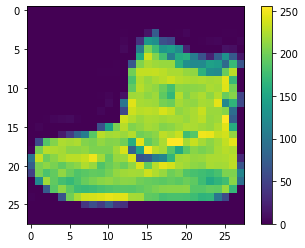

In [ ]:
# предварительно обработаем данные 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# т.к. значения пикселей попадают в диапазон от 0 до 255
# то масштабируем их от 0 до 1 с помощью деления на 255
train_images = train_images / 255.0
test_images = test_images / 255.0

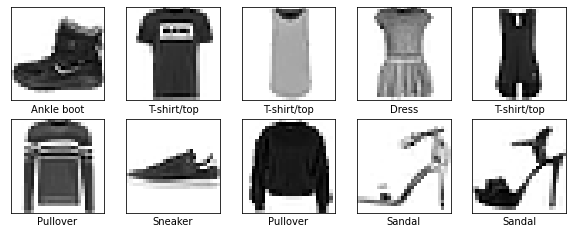

In [ ]:
# отобразим первые 10 изображений из обучающего набора 
# и отобразим имя класса под каждым изображением
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# tf.keras.layers.Flatten, преобразует формат изображений из 
# двумерного массива (28 на 28 пикселей) в одномерный массив 
# (28 * 28 = 784 пикселей)

# Первый Dense слой имеет 128 узлов (или нейронов). 
# Второй (и последний) слой возвращает массив логитов длиной 10. 
# Каждый узел содержит оценку, указывающую, что текущее изображение 
# принадлежит к одному из 10 классов.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
# компилируем модель с необходимыми настройками
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# начинаем обучение модели
from keras.preprocessing import image
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4994 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3768 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3395 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3158 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2560 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2482 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [ ]:
# сравним как модель работает с тестовым набором данных 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3295 - accuracy: 0.8850 - 543ms/epoch - 2ms/step


In [ ]:
# добавим слой softmax для преобразования линейных выходных данных модели
# логитов — в вероятности
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
# посмотрим на первый прогноз
np.argmax(predictions[0])

9

In [ ]:
# посмотрим на 100 прогноз
np.argmax(predictions[100])

3

In [ ]:
test_labels[0]

9

In [ ]:
test_labels[100]

3

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

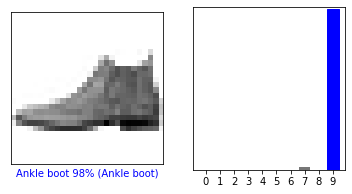

(10000, 28, 28)


In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
print(test_images.shape)

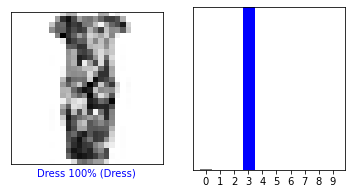

In [ ]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

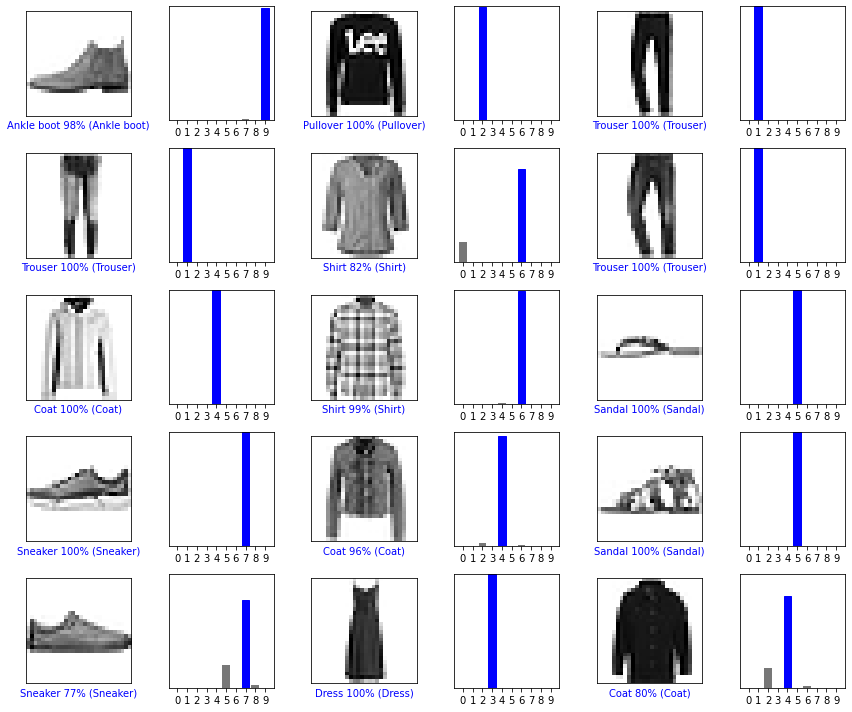

In [ ]:
# построим несколько изображений 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# используем модель чтобы предсказать одно изображение
# Модели tf.keras оптимизированы для одновременных прогнозов по группе или 
# набору примеров. Соответственно, даже если вы используете одно изображение, 
# вам нужно добавить его в список
img = test_images[1]
img = (np.expand_dims(img,0))

In [ ]:
# проверим предсказание для одного изображения
predictions_single = probability_model.predict(img)
np.argmax(predictions_single[0])

2

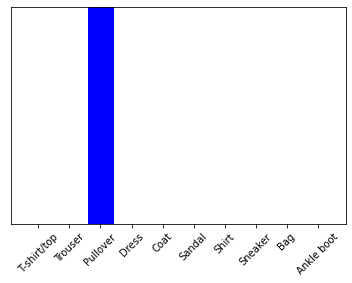

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
# проверим работоспособность нейронной сети на своих изображениях
# изображения возьмем в интернет-магазинах в размере 10 штук
from PIL import Image, ImageDraw
import random

In [ ]:
users_image_url = ['ankle_boot.jpg', 'bag.jpg', 'coat.jpg', 'dress.jpg', 
               'pullover.jpg', 'sandal.jpg', 'shirt.jpg', 'sneaker.jpg',
               't-shirt.jpg', 'trousers.jpg']
users_image_28x28 = []

In [ ]:
# нам нужно получить изображения размером 28 на 28
fixed_width = 28
for img in users_image_url:
  image = Image.open(img)
  # получаем процентное соотношение
  # старой и новой ширины
  width_percent = (fixed_width / float(image.size[0]))
  # на основе предыдущего значения
  # вычисляем новую высоту
  height_size = int((float(image.size[0]) * float(width_percent)))
  # меняем размер на полученные значения
  new_image = image.resize((fixed_width, height_size))
  # добавляем в наш список конечное изображение (чб и 28x28 пикселей)
  users_image_28x28.append(new_image)

In [ ]:
from keras.preprocessing import image

# проверим состояние наших картинок
i = 0
for img in users_image_28x28:
  img.save("test" + str(i) + ".jpg", "JPEG");
  i+=1

In [597]:
# убедившись, что картинки 28x28, приступаем к их предсказанию 
image1 = image.img_to_array(
              image.load_img('sneaker4.jpg', target_size=(28,28))) / 255
image1 = tf.image.rgb_to_grayscale(image1)
image1 = image.img_to_array(image1)
image1 = tf.squeeze(image1, axis = -1)
print(image1.shape)


(28, 28)


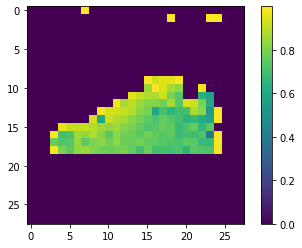

In [598]:
plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.grid(False)
plt.show()

In [599]:
image1 = np.expand_dims(image1, axis=0)
predictions = probability_model.predict(image1)

In [600]:
np.argmax(predictions[0])

7

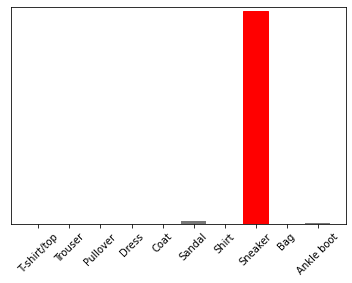

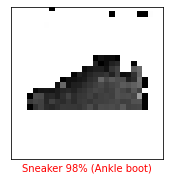

In [601]:
plot_value_array(1, predictions[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, image1)